# 01 - Introdução a SuperComputação

Como vimos na expositiva, uma solução de alto desempenho depende de três partes:

1. algoritmos eficientes
2. implementações eficientes
3. paralelismo

Na atividade de hoje vamos estudar o primeiro ponto e quantificar o efeito de algoritmos eficientes na resolução de um problema complexo. 

## Problemas estudados em SuperComputação

Em Desafios de Programação conhecemos a classe dos problemas NP-completo, que são aqueles que acreditamos não existir nenhum algoritmo determinístico que os resolvem em tempo polinomial. Ou seja, são problemas importantes cuja solução é difícil. Em geral temos classes de algoritmos para resolvê-los:

1. ótimos globais: algoritmo que encontra a solução "correta" do problema. 
2. ótimos locais: algoritmo que encontra uma solução "boa" e que não pode ser melhorada por pequenas modificações. 
3. aproximação: algoritmos que garantem estar "perto o suficiente" da solução ótima. Este tipo de algoritmo não nos interessa em SuperComputação.

Iremos analisar hoje 4 executáveis que resolvem o problema do [Caixeiro Viajante](https://en.wikipedia.org/wiki/Travelling_salesman_problem). 

1. `busca-local-1` - implementação de um método de busca rápida, porém não ótima.
1. `busca-local-1-par` - implementação paralela do programa acima.
2. `busca-local-2` - implementação alternativa do mesmo método acima. Os resultados de ambos são idênticos.
2. `busca-local-2-par` - implementação paralela do programa acima.

!!! important 
    Não estamos interessados no Caixeiro Viajante em si hoje. Queremos é comparar diferentes maneiras de resolvê-lo para entendermos o papel de técnicas de SuperComputação na velocidade de processamento e nos resultados obtidos. 


## Ferramental

Realizar testes de maneira automatizada é muito importante para quantificar os efeitos de diferentes algoritmos e técnicas de paralelismo. O snippet abaixo executa 

In [2]:
import subprocess
import time

with open('entradas-busca-local/in-0.txt') as f:
    start = time.perf_counter()
    proc = subprocess.run(['./busca-local-1'], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    print('Saída:', proc.stdout)
    print('Stderr:', proc.stderr)
    print('Tempo total(s):', end - start)

Saída: 232.234 0
3 0 4 1 2 

Stderr: 
Tempo total(s): 0.004065362999881472


Vamos agora praticar usar este snippet para executar nossos testes automaticamente. 

!!! example

    Crie uma função `roda_com_entrada(executavel, arquivo_in)` que roda o primeiro argumento usando como entrada o conteúdo do segundo argumento. Teste seu código com o executável `busca-local-1` e com o arquivo de entrada `in-0.txt` usado no exemplo acima.

    Sua função deverá devolver uma tupla `(stdout,time)` com `stdout` sendo a saída do programa e `time` seu tempo de execução em segundos. 

In [3]:
# TODO: exercício aqui
def roda_com_entrada(executavel, arquivo_in):
    with open(arquivo_in) as f:
        start = time.perf_counter()
        proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
        
        return(proc.stdout, (end - start))

In [4]:
print(roda_com_entrada('./busca-local-1', 'entradas-busca-local/in-0.txt'))

('232.234 0\n3 0 4 1 2 \n', 0.003566179000245029)


## Algoritmos sequenciais

Com esse código, vamos criar um relatório interativo que roda nossos testes automaticamente e já plota informações prontas para nossas análises. Vamos começar examinando o desempenho do executável `busca-local-1`.

!!! example

    Rode o `busca-local` com os arquivos de entrada na pasta `entradas-busca-local`. Guarde os tempos em uma lista.

!!! example

    Leia o tamanho das entradas dos arquivos  na pasta `entradas-busca-local` e guarde em uma segunda lista.

!!! example 

    Plote o tempo de execução pelo tamanho da entrada usando `matplotlib`

In [32]:
import os

executavel = "./busca-local-1"
directory = "entradas-busca-local"
time_list=[]
size_list=[]
arr = os.listdir(directory)
for arquivo_in in arr:
    if arquivo_in[:2] == "in":
        path = directory + "/" + arquivo_in
        print(path)
        inputs = sum(1 for line in open(path))
        size_list.append(inputs)
        time_list.append(roda_com_entrada((executavel), (path))[1])

time_list

entradas-busca-local/in-1.txt
entradas-busca-local/in-4.txt
entradas-busca-local/in-8.txt
entradas-busca-local/in-7.txt
entradas-busca-local/in-6.txt
entradas-busca-local/in-5.txt
entradas-busca-local/in-2.txt
entradas-busca-local/in-0.txt
entradas-busca-local/in-9.txt
entradas-busca-local/in-3.txt


[0.0062147080006980104,
 0.07609351400060405,
 5.912204447000477,
 2.6219820639998943,
 1.0350047370002358,
 0.3074835500001427,
 0.0057042799999180716,
 0.004188178000731568,
 13.087394516999666,
 0.012300088000301912]

In [33]:
sorted_size1 = sorted(size_list)
print(sorted_size1)

[6, 11, 16, 21, 31, 41, 51, 61, 71, 81]


In [34]:
sorted_time1 = sorted(time_list)
sorted_time1

[0.004188178000731568,
 0.0057042799999180716,
 0.0062147080006980104,
 0.012300088000301912,
 0.07609351400060405,
 0.3074835500001427,
 1.0350047370002358,
 2.6219820639998943,
 5.912204447000477,
 13.087394516999666]

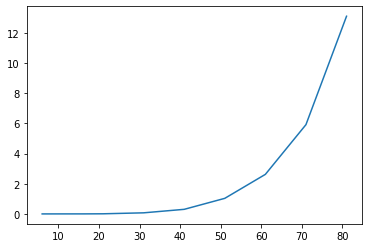

In [35]:
from matplotlib import pyplot as plt
plt.plot(sorted_size1, sorted_time1)

!!! example
    Repita os três passos acima para o executável `busca-local-2`. Finalize plotando os tempos de execução de ambos os executáveis no mesmo gráfico.

entradas-busca-local/in-1.txt
entradas-busca-local/in-4.txt
entradas-busca-local/in-8.txt
entradas-busca-local/in-7.txt
entradas-busca-local/in-6.txt
entradas-busca-local/in-5.txt
entradas-busca-local/in-2.txt
entradas-busca-local/in-0.txt
entradas-busca-local/in-9.txt
entradas-busca-local/in-3.txt


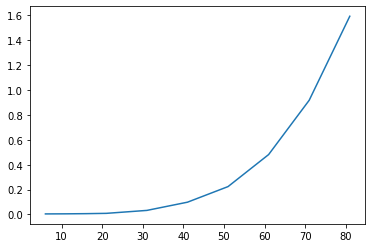

In [36]:
import os
from matplotlib import pyplot as plt

executavel = "./busca-local-2"
directory = "entradas-busca-local"
time_list=[]
size_list=[]
arr = os.listdir(directory)
for arquivo_in in arr:
    if arquivo_in[:2] == "in":
        path = directory + "/" + arquivo_in
        print(path)
        inputs = sum(1 for line in open(path))
        size_list.append(inputs)
        time_list.append(roda_com_entrada((executavel), (path))[1])

sorted_size2 = sorted(size_list)
sorted_time2 = sorted(time_list)
plt.plot(sorted_size2, sorted_time2)

!!! example
    Segundo uma coleta de dados informal e altamente confiável, 93,17% dos alunos não colocam legendas nem títulos nos gráficos gerados. Faça isso agora. 

Text(0.5, 0, 'Size')

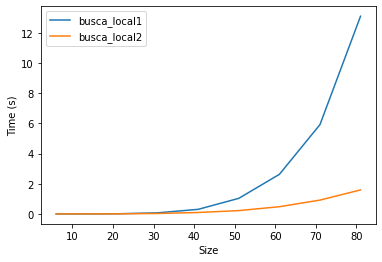

In [38]:
plt.plot(sorted_size1, sorted_time1, label='busca_local1')
plt.plot(sorted_size2, sorted_time2, label='busca_local2')
plt.legend()
plt.ylabel("Time (s)")
plt.xlabel("Size")

!!! question medium

    Interprete o gráfico que você gerou na linha de cima. 

!!! question medium
    Compare manualmente a saída dos programas. Existe diferença em seus resultados?

!!! question medium 
    Resgate seus conhecimentos de Desafios de Programação e explique a diferença entre os algoritmos.


## Algoritmos paralelos

Na discussão inicial da expositiva chegamos à conclusão de que se conseguimos realizar *N* operações em paralelo teremos um ganho de no máximo *N* vezes no desempenho de nosso programa. Nesta parte iremos estudar esta afirmação usando implementações paralelas dos algoritmos da seção anterior. 

!!! example
    Execute os algoritmos paralelos com as mesmas entradas e compare com suas versões paralelas. Use um gráfico para facilitar as comparações

!!! question medium
    Compare os tempos obtidos. Qual foi o ganho médio? Quantos *núcleos* a máquina que você está usando possui? Responda comparando cada algoritmo sequencial com sua versão paralela.

Já estabelecemos que `busca-local-2` é melhor que `busca-local-1` por ser utilizar um algoritmo mais eficiente e vimos na prática a diferença entre um algoritmo $O(n^3)$ e um algoritmo $O(n^2)$. Vamos agora examinar a seguinte questão.

!!! cite "É possível usar paralelismo para tornar `busca-local-1-par` melhor que `busca-local-2`?"

!!! example
    Compare o desempenho de `busca-local-1-par` com `busca-local-2`. Faça um gráfico

!!! question medium
    Com base em seu gráfico acima, responda a pergunta: "É possível usar paralelismo para tornar busca-local-1-par melhor que busca-local-2?"

Vamos agora generalizar a pergunta:

!!! question medium
    Dados dois algoritmos com complexidades computacionais diferentes, sendo que o primeiro é inferior ao segundo. É possível usar paralelismo para tornar o primeiro mais rápido que o segundo para todos tamanhos de entrada? Assuma que você possui um número fixo de *núcleos*. 
